Suppose

* $f_k(x)$ is the class-conditional density of $X$ in class $G=k$,
* $\pi_k$ is the prior probability of class $k$, with $\sum\pi_k=1$. 
<br>

A simple application of Bayes theorem gives us

$$
\text{Pr}(G=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^K f_l(x)\pi_l}.
$$
We see that in terms of ability to classify, it is enough to have the $f_k(x)$.

Many techniques are based on models for the class densities:

* linear and quadratic discriminant analysis use Gaussian densities;
* more flexible mixtures of Gaussian allow for nonlinear decision boundaires ($\S$ 6.8);
* general nonparametric density estimates for each class density allow the most flexibility ($\S$ 6.6.2);
* Naive Bayes models are a variant of the previous case, and assume that the inputs are conditionally independent in each class; i.e., each of the class densities are products of marginal densities ($\S$ 6.6.3).

Suppose that we model each class density as **multivariate Gaussian**

$$
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp\left\lbrace -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) \right\rbrace
$$
Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $\Sigma_k=\Sigma,\forall k$.

In comparing two classes $k$ and $l$, it is sufficient to look at the log-ratio, and we see that as an equation linear in $x$,

$$\begin{align}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=l|X=x)} \\
= \log\frac{f_k(x)}{f_l(x)} + \log\frac{\pi_k}{\pi_l} \\
= \log\frac{\pi_k}{\pi_l} - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \frac{1}{2}\mu_l^T\Sigma^{-1}\mu_l + x^T\Sigma^{-1}(\mu_k-\mu_l) \\
= \delta_k(x) - \delta_l(x),
\end{align}$$
where $\delta_k$ is the linear discriminant function

$$
\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log\pi_k.
$$

The equal covariance matrices cause the normalization factors to cancel, as well as the quadratic part in the exponents. This linear log-odds function implies that the decision boundary between classes k and l—the set where Pr(G = k|X = x) = Pr(G = l|X = x)—is linear in x; in p dimensions a hyperplane. This is of course true for any pair of classes, so all the decision boundaries are linear. 

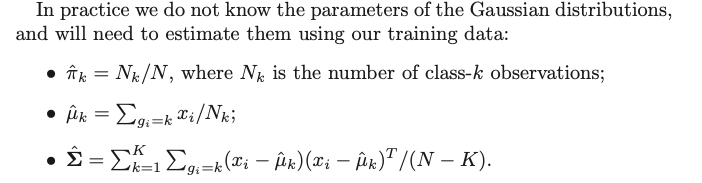

This linear log-odds function implies that the decision boundary between classes $k$ and $l$

$$
\left\lbrace x: \delta_k(x) - \delta_l(x) = 0 \right\rbrace
$$
is linear in $x$; in $p$ dimensions a hyperplane. Also the linear discriminant functions are equivalent description of the decision rule, with

$$
G(x) = \arg\max_k \delta_k(x).
$$

# Simulation

In [3]:
"""FIGURE 4.5. An idealized example with K=3, p=2, and a common covariance """
import numpy as np
import matplotlib.pyplot as plt

In [21]:
cov = np.eye(2)

In [25]:
cluster1 = np.random.multivariate_normal([-1, 0], cov, size)
cluster2 = np.random.multivariate_normal([1, 0], cov, size)
cluster3 = np.random.multivariate_normal([0, 1], cov, size)

In [28]:
cluster1

array([[ 0.32321573, -2.38928241],
       [ 0.1374131 ,  0.3365765 ],
       [-1.53308545,  0.38379051],
       [ 1.37278283,  0.64217272],
       [ 0.51951647, -0.26095658],
       [ 0.08657592, -1.53618015],
       [-0.16937605, -0.79543417],
       [-0.06882829, -0.17371317],
       [-1.48774152, -0.49296151],
       [-0.39165201,  0.23043159],
       [-0.64020823, -1.35444553],
       [-3.09874169,  0.09623145],
       [-1.59327614, -0.92147271],
       [-2.26611444, -1.05037859],
       [-0.88331652, -0.30770168],
       [-1.89821631,  0.42501664],
       [-1.59268825, -1.00303557],
       [-1.07098978,  0.35680311],
       [-1.81852607, -1.58916182],
       [-1.83762544,  1.20809614],
       [-1.07651662, -0.45234799],
       [-2.27059644, -1.51705696],
       [ 0.89106445, -0.36680631],
       [-2.37494152,  0.00434043],
       [-2.35424836,  1.03356096],
       [-1.15462022,  0.52711943],
       [-1.18045131, -0.2441288 ],
       [-1.52275908, -1.31961449],
       [ 0.52820485,

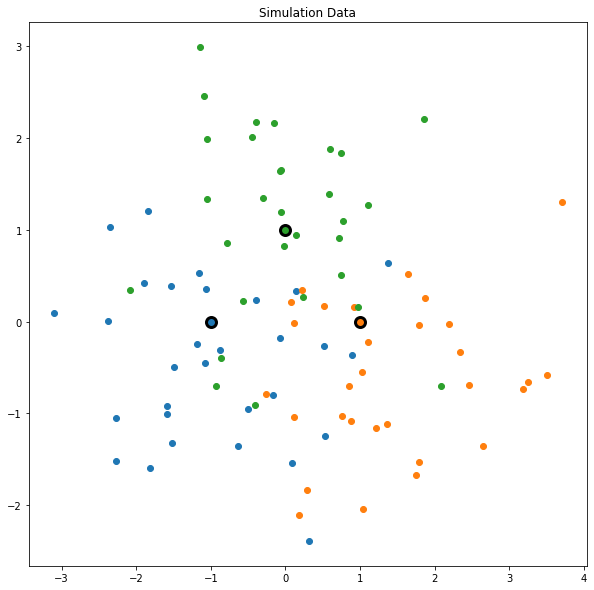

In [30]:
fig1 = plt.figure(1, figsize = (10,10))
ax1 = fig1.add_subplot()
ax1.plot(cluster1[:, 0], cluster1[:, 1], 'o', color='C0')
ax1.plot(cluster2[:, 0], cluster2[:, 1], 'o', color='C1')
ax1.plot(cluster3[:, 0], cluster3[:, 1], 'o', color='C2')
ax1.plot(-1, 0, 'o', color='C0', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.plot(1, 0, 'o', color='C1', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.plot(0, 1, 'o', color='C2', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.set_title('Simulation Data')
plt.show()

# LDA

In [31]:
vec_mean1 = cluster1.mean(axis=0)
vec_mean2 = cluster2.mean(axis=0)
vec_mean3 = cluster3.mean(axis=0)

In [32]:
vec_mean1

array([-0.96444582, -0.42430951])

In [33]:
cluster_centered1 = cluster1 - vec_mean1
cluster_centered2 = cluster2 - vec_mean2
cluster_centered3 = cluster3 - vec_mean3

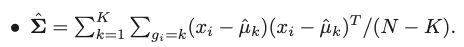

In [34]:
sim_cov = (np.matmul(np.transpose(cluster_centered1), cluster_centered1) +
           np.matmul(np.transpose(cluster_centered2), cluster_centered2) +
           np.matmul(np.transpose(cluster_centered3), cluster_centered3)) / (3*size - 3)

In [35]:
sim_cov

array([[ 1.10648175, -0.00707019],
       [-0.00707019,  0.80198246]])


$$
\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log\pi_k.
$$

In [45]:
cov_inv_mean1 = np.matmul(np.linalg.inv(sim_cov),vec_mean1)
cov_inv_mean2 = np.matmul(np.linalg.inv(sim_cov),vec_mean2)
cov_inv_mean3 = np.matmul(np.linalg.inv(sim_cov),vec_mean3)

In [51]:
cov_inv_mean1

array([-0.87506281, -0.53679025])

In [48]:
mat_x = np.vstack((cluster1, cluster2, cluster3))

In [53]:
mat_x.shape

(90, 2)

In [57]:
np.matmul(np.transpose(vec_mean1), cov_inv_mean1)/2

0.5358579383161401

In [58]:
mat_delta_1 = np.matmul(mat_x, cov_inv_mean1) - np.matmul(np.transpose(vec_mean1), cov_inv_mean1)/2

In [59]:
mat_delta_1

array([ 0.4638515 , -0.83677402,  0.59967312, -2.08184119, -0.85038853,
        0.21298922,  0.03933805, -0.38238133,  1.03062627, -0.31683127,
        0.75141763,  2.12407956,  1.35299632,  2.01096751,  0.40227076,
        0.89705577,  1.39626402,  0.20979695,  1.90851317,  0.42368551,
        0.64897771,  2.26539795, -1.11869725,  1.54003515,  0.96945179,
        0.1915547 ,  0.62815706,  1.50500809, -0.32955372,  0.42009763,
       -1.38336601, -1.42562916,  0.43956786, -2.2459378 , -0.35081471,
       -1.14135019, -2.32769683, -2.30760688, -0.65449939, -0.72389873,
       -2.08980259, -0.71639461, -4.47659246,  0.19089219, -2.93589472,
       -1.2904496 , -2.12476594, -0.07739322, -0.90498176,  0.11531112,
       -0.91866459, -2.43791256, -1.07517163, -0.97663356, -1.1367054 ,
       -3.03353718, -1.16840591, -3.29712859, -0.62432207, -2.41256159,
       -2.18690765, -0.30562498, -0.16192803, -1.47317558, -1.98968121,
       -1.79747631,  0.30942324, -1.36606813, -1.65317263, -1.35

In [60]:
mat_delta_2 = np.matmul(mat_x, cov_inv_mean2) - np.matmul(np.transpose(vec_mean2), cov_inv_mean2)/2
mat_delta_3 = np.matmul(mat_x, cov_inv_mean3) - np.matmul(np.transpose(vec_mean3), cov_inv_mean3)/2

In [72]:
mat_delta = np.vstack((mat_delta_1, mat_delta_2, mat_delta_3))

In [73]:
mat_delta = np.transpose(mat_delta)

In [74]:
mat_delta[:10]

array([[ 0.4638515 ,  1.06725875, -4.03086999],
       [-0.83677402, -1.21120474, -0.2941693 ],
       [ 0.59967312, -3.38094492, -0.1975492 ],
       [-2.08184119,  0.1383969 ,  0.10071949],
       [-0.85038853, -0.27557335, -1.11981908],
       [ 0.21298922,  0.12612069, -2.85799343],
       [ 0.03933805, -0.75556245, -1.83862273],
       [-0.38238133, -1.09262438, -0.9890807 ],
       [ 1.03062627, -2.66651619, -1.39915503],
       [-0.31683127, -1.80770947, -0.42941616]])

In [68]:
mat_delta.argmax(axis=1) == 0

array([False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False])

In [69]:
cluster_classified1 = mat_x[mat_delta.argmax(axis=1) == 0]
cluster_classified2 = mat_x[mat_delta.argmax(axis=1) == 1]
cluster_classified3 = mat_x[mat_delta.argmax(axis=1) == 2]

Calculate decision boundaries:


$$
\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log\pi_k.
$$

$$
\delta_m(x) = \delta_n(x)
$$

In [76]:
center12 = (vec_mean1 + vec_mean2)/2
center13 = (vec_mean1 + vec_mean3)/2
center23 = (vec_mean2 + vec_mean3)/2

In [81]:
second_term1 = np.matmul(np.transpose(vec_mean1), cov_inv_mean1)/2
second_term2 = np.matmul(np.transpose(vec_mean2), cov_inv_mean2)/2
second_term3 = np.matmul(np.transpose(vec_mean3), cov_inv_mean3)/2

[x1,x2] * cov_inv_mean1 - second_term1 = [x1,x2] * cov_inv_mean2 - second_term2

(x1 * cov1[0] + x2 * cov1[1]) - (x1 * cov2[0] + x2 * cov2[1]) = sec1 - sec2 <br>
x1 * (cov1[0] - cov2[0]) + x2 * (cov1[1] - cov2[1]) = sec1 - sec2 <br>
x2 = -(cov1[0] - cov2[0])/(cov1[1] - cov2[1]) * x1 + (sec1 - sec2)/(cov1[1] - cov2[1])

In [82]:
k12 = -(cov_inv_mean1[0] - cov_inv_mean2[0])/(cov_inv_mean1[1] - cov_inv_mean2[1])
k13 = -(cov_inv_mean1[0] - cov_inv_mean3[0])/(cov_inv_mean1[1] - cov_inv_mean3[1])
k23 = -(cov_inv_mean2[0] - cov_inv_mean3[0])/(cov_inv_mean2[1] - cov_inv_mean3[1])

In [83]:
b12 = (second_term1 - second_term2)/(cov_inv_mean1[1] - cov_inv_mean2[1])
b13 = (second_term1 - second_term3)/(cov_inv_mean1[1] - cov_inv_mean3[1])
b23 = (second_term2 - second_term3)/(cov_inv_mean2[1] - cov_inv_mean3[1])

solve the intersection of three lines:

In [84]:
x_inter = -(b12 - b13)/(k12 - k13)
x_inter

0.27713729657039693

In [85]:
y_inter = k12 * x_inter + b12
y_inter

-0.010793767114324115

In [87]:
# check that the thrid line also passes through
k23 * x_inter + b23

-0.010793767114324226

In [95]:
inter = np.array([x_inter, y_inter])
inter

array([ 0.2771373 , -0.01079377])

In [96]:
edge_marker12_y = -4
edge_marker12_x = (edge_marker12_y - b12)/k12
edge_marker12 = np.array([edge_marker12_x, edge_marker12_y])

In [99]:
edge_marker13 = np.array([-4, -4*k13+b13])
edge_marker23 = np.array([4, 4*k23+b23])

In [101]:
edge_marker12

array([-0.11569126, -4.        ])

In [102]:
edge_marker13

array([-4.        ,  1.90962622])

In [103]:
edge_marker23

array([4.        , 2.26833883])

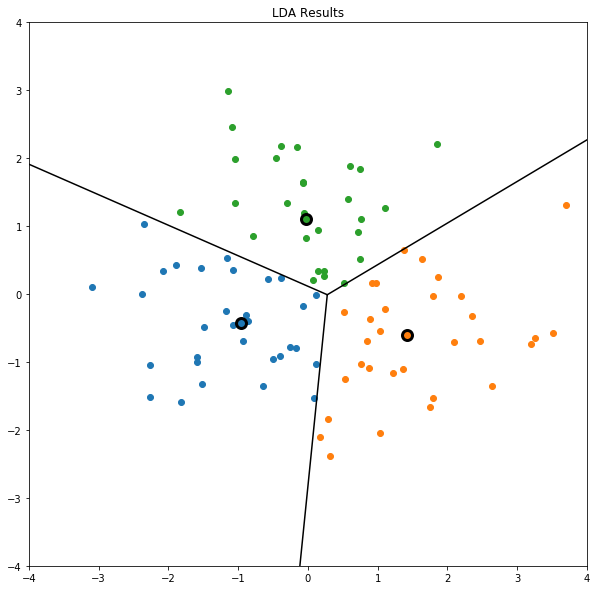

In [112]:
fig2 = plt.figure(2, figsize = (10, 10))
ax2 = fig2.add_subplot()
ax2.plot(cluster_classified1[:, 0], cluster_classified1[:, 1], 'o', color='C0')
ax2.plot(cluster_classified2[:, 0], cluster_classified2[:, 1], 'o', color='C1')
ax2.plot(cluster_classified3[:, 0], cluster_classified3[:, 1], 'o', color='C2')
ax2.plot(vec_mean1[0], vec_mean1[1], 'o', color='C0', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.plot(vec_mean2[0], vec_mean2[1], 'o', color='C1', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.plot(vec_mean3[0], vec_mean3[1], 'o', color='C2', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.plot([edge_marker12[0], inter[0]], [edge_marker12[1],inter[1]], '-', color='black')
ax2.plot([edge_marker13[0], inter[0]], [edge_marker13[1],inter[1]], '-', color='black')
ax2.plot([edge_marker23[0], inter[0]], [edge_marker23[1],inter[1]], '-', color='black')
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_title('LDA Results')
plt.show()